In [1]:
import sympy as sp
import numpy as np

from sympy.solvers.ode import dsolve

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

from pprint import pprint as ppr

(3y + 7)·dy + (2x + 1)·dx = 0

y(0) = 2

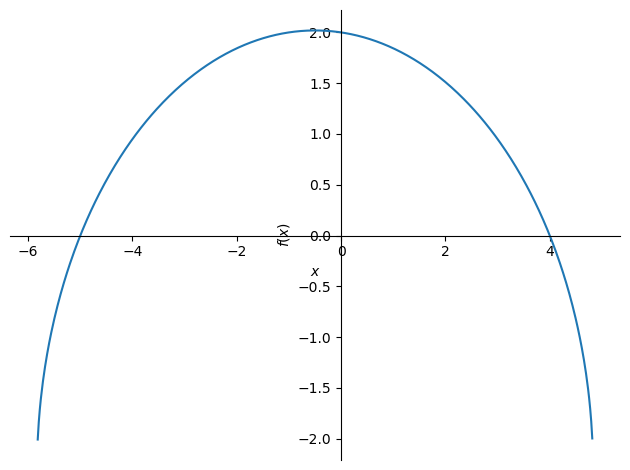

In [2]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

ec = y.diff(x) + (2*x+1)/(3*y+7)

sol = dsolve(ec, y, ics={y.subs(x,0):2})

sp.plot(sol.rhs)

<function matplotlib.pyplot.show(close=None, block=None)>

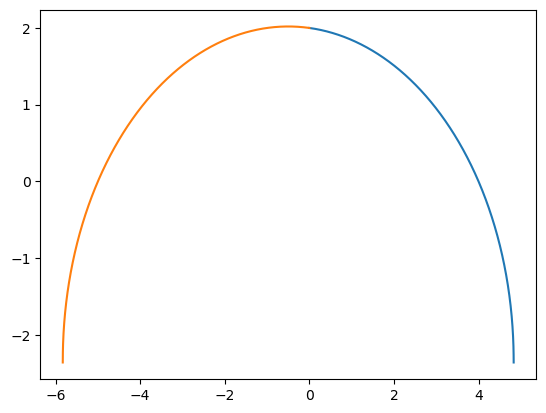

In [3]:
def eq(t, y):
    return [ - (2 * t + 1) / (3 * y[0] + 7) ]

def stop(t, y):
    return y[0] > -7/3

stop.direction = -1
stop.terminal = True

sol1 = solve_ivp(eq, [0, 8], [2], max_step=0.001, events=stop, dense_output=True)
sol2 = solve_ivp(eq, [0, -8], [2], max_step=0.001, events=stop, dense_output=True)

plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.show


dx(t)/dt = x(t) − 4y(t)

dy(t)/dt = 4x(t) − 7y(t)

Con x(0) = 1, y(0) = 2

[Eq(x(t), -4*t*exp(-3*t) + exp(-3*t)), Eq(y(t), -4*t*exp(-3*t) + 2*exp(-3*t))]
-4*t*exp(-3*t) + exp(-3*t)
-4*t*exp(-3*t) + 2*exp(-3*t)


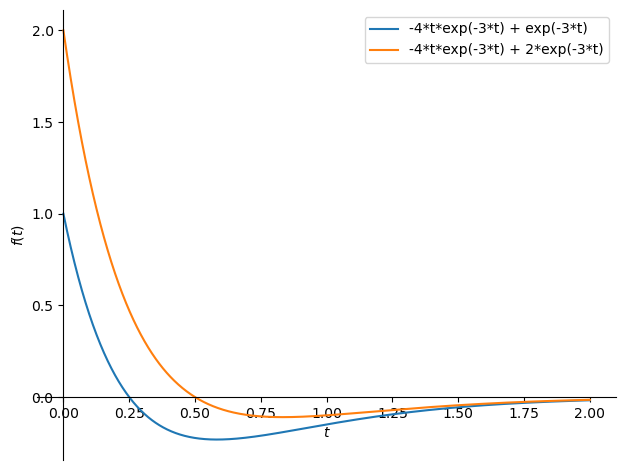

In [4]:
t = sp.Symbol('t')

x = sp.Function('x')(t)
y = sp.Function('y')(t)

initial_conditions = {x.subs(t, 0): 1, y.subs(t, 0): 2}

sol_sistema = dsolve( ( x.diff(t) - x + 4*y , y.diff(t) - 4*x + 7*y ), ics=initial_conditions )
print(sol_sistema)

print(sol_sistema[0].rhs)
print(sol_sistema[1].rhs)

sp.plot(sol_sistema[0].rhs, sol_sistema[1].rhs, (t, 0, 2), legend=True)


[0.         0.05148825 0.26558012 0.46353931 0.64580692 0.81945562
 1.02736798 1.2603537  1.5227878  1.81449623 2.        ]
[ 1.          0.68039801 -0.02787577 -0.21244454 -0.22799312 -0.19485682
 -0.1425651  -0.09210838 -0.05279955 -0.0270488  -0.01734541]
[ 2.          1.5372717   0.42294403  0.03649771 -0.08390348 -0.10927249
 -0.09669525 -0.06930415 -0.04241973 -0.02272037 -0.01486428]


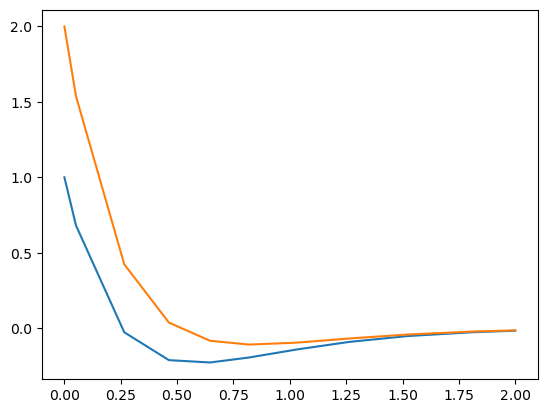

In [5]:
def sistema(t, variables):
    x, y = variables
    dxdt = x - 4*y
    dydt = 4*x - 7*y
    return [dxdt, dydt]

sol = solve_ivp(sistema, [0, 2], [1, 2])
t_val = sol.t
x_val = sol.y[0]  
y_val = sol.y[1] 

print(t_val)
print(x_val)
print(y_val)

plt.plot(t_val, x_val, label='x(t)')
plt.plot(t_val, y_val, label='y(t)')
plt.show()


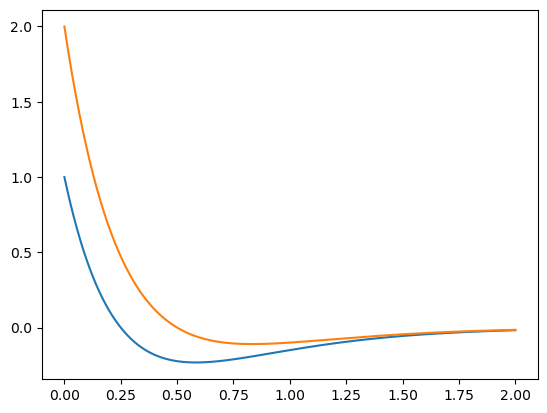

In [6]:
sol = solve_ivp(sistema, [0,2], [1,2], dense_output=True)

t = np.linspace(0, 2, 1000)
sol_dense = sol.sol(t)

plt.plot(t, sol_dense[0], label='x(t)')
plt.plot(t, sol_dense[1], label='y(t)')
plt.show()


[0.    0.002 0.004 ... 1.996 1.998 2.   ]
[ 1.          0.98606581  0.97226253 ... -0.01751464 -0.01742983
 -0.01734541]
[ 2.          1.98008377  1.96033424 ... -0.01500355 -0.01493377
 -0.01486428]


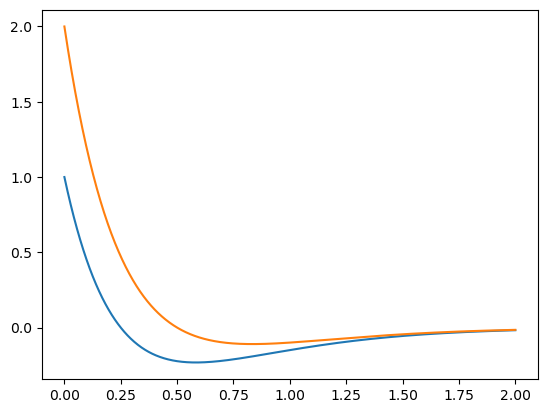

In [7]:
def sistema(t, variables):
    x, y = variables
    dxdt = x - 4*y
    dydt = 4*x - 7*y
    return [dxdt, dydt]

sol = solve_ivp(sistema, [0, 2], [1, 2], t_eval=np.linspace(0, 2, 1001))
t_val = sol.t
x_val = sol.y[0]  
y_val = sol.y[1] 

print(t_val)
print(x_val)
print(y_val)

plt.plot(t_val, x_val, label='x(t)')
plt.plot(t_val, y_val, label='y(t)')
plt.show()

In [8]:
from sympy import Matrix, Symbol, pprint

data = [ [3, -1, -4,  2],
         [2,  3, -2, -4],
         [2, -1, -3,  2],
         [1,  2, -1, -3] ]

A = Matrix(data)
print(type(A))

AN=np.matrix(data)
print(type(AN))

eigenvalues, eigenvectors = np.linalg.eig(AN)
ppr(eigenvalues)
ppr(eigenvectors)


<class 'sympy.matrices.dense.MutableDenseMatrix'>
<class 'numpy.matrix'>
array([ 1.00000003,  0.99999997, -1.00000001, -0.99999999])
matrix([[-2.49344110e-08, -2.49344126e-08, -7.07106781e-01,
         -7.07106781e-01],
        [-8.94427191e-01,  8.94427191e-01,  1.05367117e-08,
         -1.05367125e-08],
        [-1.24672054e-08, -1.24672064e-08, -7.07106781e-01,
         -7.07106781e-01],
        [-4.47213595e-01,  4.47213595e-01,  1.05367118e-08,
         -1.05367124e-08]])


In [9]:
P, J = A.jordan_form()
pprint(P)
pprint(J)

⎡1  0  0  2⎤
⎢          ⎥
⎢0  1  2  0⎥
⎢          ⎥
⎢1  0  0  1⎥
⎢          ⎥
⎣0  1  1  0⎦
⎡-1  1   0  0⎤
⎢            ⎥
⎢0   -1  0  0⎥
⎢            ⎥
⎢0   0   1  1⎥
⎢            ⎥
⎣0   0   0  1⎦


In [10]:
t = Symbol('t')
E= (A*t).exp()
pprint(E)
pprint(E)

⎡   t    -t        -t         t      -t          -t    ⎤
⎢2⋅ℯ  - ℯ      -t⋅ℯ      - 2⋅ℯ  + 2⋅ℯ       2⋅t⋅ℯ      ⎥
⎢                                                      ⎥
⎢       t       t    -t           t           t      -t⎥
⎢  2⋅t⋅ℯ     2⋅ℯ  - ℯ       -2⋅t⋅ℯ       - 2⋅ℯ  + 2⋅ℯ  ⎥
⎢                                                      ⎥
⎢  t    -t         -t        t      -t           -t    ⎥
⎢ ℯ  - ℯ       -t⋅ℯ       - ℯ  + 2⋅ℯ        2⋅t⋅ℯ      ⎥
⎢                                                      ⎥
⎢      t       t    -t           t           t      -t ⎥
⎣   t⋅ℯ       ℯ  - ℯ         -t⋅ℯ         - ℯ  + 2⋅ℯ   ⎦
⎡   t    -t        -t         t      -t          -t    ⎤
⎢2⋅ℯ  - ℯ      -t⋅ℯ      - 2⋅ℯ  + 2⋅ℯ       2⋅t⋅ℯ      ⎥
⎢                                                      ⎥
⎢       t       t    -t           t           t      -t⎥
⎢  2⋅t⋅ℯ     2⋅ℯ  - ℯ       -2⋅t⋅ℯ       - 2⋅ℯ  + 2⋅ℯ  ⎥
⎢                                                      ⎥
⎢  t    -t         -t        t 

In [15]:
# Definir la matriz A
A = np.array( [ [4, 1],
              [  2, 3] ] )

# Cálculo de autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Autovalores:", eigenvalues)
print("Autovectores:\n", eigenvectors)

Autovalores: [5. 2.]
Autovectores:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [17]:
# Definir la matriz A
A = Matrix([ [2, 1 ],
             [0, 2 ] ])

# Calcular forma de Jordan
P, J = A.jordan_form()

print("Matriz de cambio de base (P):")
pprint(P)

print("Forma de Jordan (J):")
pprint(J)

Matriz de cambio de base (P):
⎡1  0⎤
⎢    ⎥
⎣0  1⎦
Forma de Jordan (J):
⎡2  1⎤
⎢    ⎥
⎣0  2⎦


In [19]:
# Definir la matriz A
A = Matrix([[2,  0],
            [0, -3]])

# Definir la variable temporal t
t = Symbol('t')

# Calcular la matriz exponencial
E = (A * t).exp()
pprint(E)


⎡ 2⋅t       ⎤
⎢ℯ       0  ⎥
⎢           ⎥
⎢       -3⋅t⎥
⎣ 0    ℯ    ⎦


In [18]:
# Definir la matriz A
A = Matrix( [ [ 0,  1],
              [-2, -3] ] )

# Definir la variable temporal t
t = Symbol('t')

# Calcular la matriz exponencial
E = (A * t).exp()
pprint(E)


⎡     -t    -2⋅t       -t    -2⋅t  ⎤
⎢  2⋅ℯ   - ℯ          ℯ   - ℯ      ⎥
⎢                                  ⎥
⎢     -t      -2⋅t     -t      -2⋅t⎥
⎣- 2⋅ℯ   + 2⋅ℯ      - ℯ   + 2⋅ℯ    ⎦


In [20]:
# Definir la matriz A
A = Matrix( [ [1, 0],
              [0, -1] ] )

# Definir la variable temporal t
t = Symbol('t')

x0 = Matrix([1, 2])  # Condiciones iniciales
E = (A * t).exp()    # Matriz exponencial
sol = E @ x0         # Solución general
pprint(sol)


⎡  t  ⎤
⎢ ℯ   ⎥
⎢     ⎥
⎢   -t⎥
⎣2⋅ℯ  ⎦


⎡                                                 -t⋅(3 + √71⋅ⅈ) ⎤
⎢                                                 ───────────────⎥
⎢⎛    √71⋅ⅈ⋅t            √71⋅ⅈ⋅t               ⎞         2       ⎥
⎢⎝71⋅ℯ        - 7⋅√71⋅ⅈ⋅ℯ        + 71 + 7⋅√71⋅ⅈ⎠⋅ℯ               ⎥
⎢────────────────────────────────────────────────────────────────⎥
⎢                              142                               ⎥
⎢                                                                ⎥
⎢                                                -t⋅(3 + √71⋅ⅈ)  ⎥
⎢ ⎛                     √71⋅ⅈ⋅t               ⎞  ─────────────── ⎥
⎢ ⎜ √71⋅ⅈ⋅t   23⋅√71⋅ⅈ⋅ℯ              23⋅√71⋅ⅈ⎟         2        ⎥
⎢ ⎜ℯ        + ───────────────── + 1 - ────────⎟⋅ℯ                ⎥
⎣ ⎝                  71                  71   ⎠                  ⎦


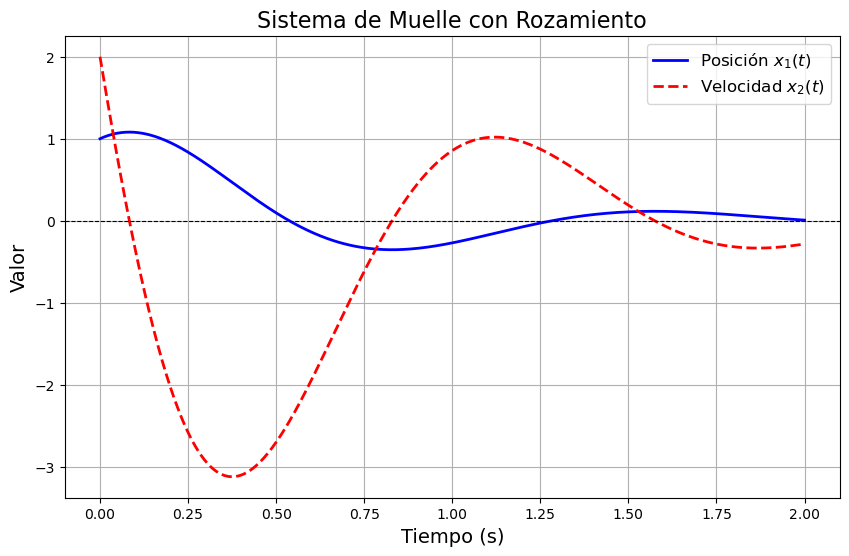

In [30]:
# Sistema de muelle con rozamiento (caso típico de un oscilador amortiguado)
# 
# m x¨ + b x˙ + kx = 0,
# 
# donde:
# 
# m es la masa del objeto.
# b es el coeficiente de rozamiento.
# k es la constante del muelle.
# x(t) es el desplazamiento del objeto en función del tiempo.
# 
# x1˙ = x2
# x2˙ = - k/m * x1 - b/m * x2

# Definir la matriz A
A = sp.Matrix( [ [   0,  1 ],
              [ -20, -3 ] ] )


# Definir la variable temporal t
t = Symbol('t')

# Definir las condiciones iniciales
x0 = Matrix([1, 2])

# Calcular la matriz exponencial
E = (A * t).exp()

# Calcular la solución general
sol = E @ x0

pprint(sp.simplify(sol))

# Tomar la parte real de las soluciones simbólicas
sol_real = sp.Matrix([sp.re(sol[i]) for i in range(sol.shape[0])])

# Convertir la solución simbólica real a funciones numéricas
x1_func = sp.lambdify(t, sol_real[0], 'numpy')  # Primera componente (posición)
x2_func = sp.lambdify(t, sol_real[1], 'numpy')  # Segunda componente (velocidad)

# Crear un rango de tiempo
time = np.linspace(0, 2, 500)  # De 0 a 2 segundos con 500 puntos

# Evaluar las funciones numéricas
x1_vals = x1_func(time)
x2_vals = x2_func(time)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar posición (x1) y velocidad (x2)
plt.plot(time, x1_vals, label="Posición $x_1(t)$", color="blue", linewidth=2)
plt.plot(time, x2_vals, label="Velocidad $x_2(t)$", color="red", linestyle="--", linewidth=2)

# Etiquetas y título
plt.title("Sistema de Muelle con Rozamiento", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend(fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()


Modelo depredador presa de Lokta-Volterra

dx(t)/dt = a * x(t) − b * x(t) * y(t)

dy(t)/dt = −c * y(t) + d * x(t) * y(t)

x(t) = número de presas

y(t) = número de depredadores

a = el crecimiento de poblaciones de presas (recursos naturales disponibles), 

b = éxito en la caza del depredador (disminución de presas), 

c = tasa de crecimiento de depredadores (término negativo por decrecimiento por muertes)

d = éxito en la caza del depredador (beneficio de depredadores).

Para valores de los parámetros medidos experimentalmente (a, b, c, d) = (2, 0.75, 4, 0.75) y poblaciones iniciales en el ecosistema de 10 conejos y 5 zorros.

Asumiendo que el tiempo se mide en meses, dar una estimación de cuantos individuos de cada especie habrá en el ecosistema al cabo de un año.


Al cabo de 12 meses:
Presas: 11.49
Depredadores: 1.93


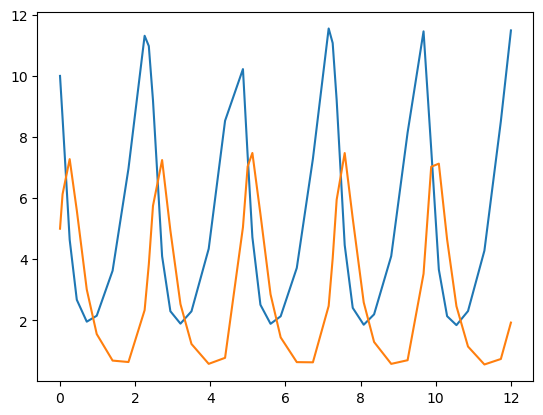

In [36]:
a, b, c, d = 2, 0.75, 4, 0.75
               
def eq(t, y):
    presas, depredadores = y
    return [ a * presas - b * presas * depredadores,
             -c * depredadores + d * presas * depredadores ]

sol = solve_ivp(eq, [0, 12], [10, 5], dense_output=True)

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.show

# Instante de tiempo específico (en meses)
t_specific = 12

# Evaluar la solución en ese instante
presas, depredadores = sol.sol(t_specific)

# Mostrar resultados
print(f"Al cabo de {t_specific} meses:")
print(f"Presas: {presas:.2f}")
print(f"Depredadores: {depredadores:.2f}")


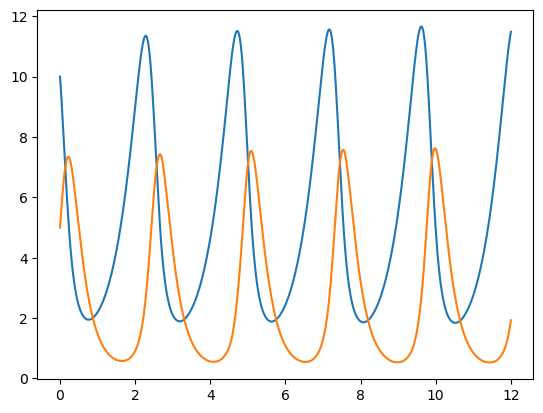

In [39]:
t = np.linspace(0, 12, 1001)
sol_dense = sol.sol(t)

plt.plot(t, sol_dense[0], label='x(t)')
plt.plot(t, sol_dense[1], label='y(t)')
plt.show()


Considerando una simplificación del sistema anterior,

dx(t)/dt =  ax(t) - by(t)

dy(t)/dt = -cy(t) + dx(t)

obtener lo necesario para su estudio; autovalores, forma de Jordan y matriz exponencial.


In [50]:
data = [ [ a, -b ], [ d, -c ] ]

A = sp.Matrix(data)
print(type(A))

AN=np.matrix(data)
print(type(AN))

eigenvalues, eigenvectors = np.linalg.eig(AN)

print("Autovalores:", eigenvalues)
print("Autovectores:\n", eigenvectors)

# Calcular forma de Jordan
P, J = A.jordan_form()

print("Matriz de cambio de base (P):")
pprint(P)

print("Forma de Jordan (J):")
pprint(J)


<class 'sympy.matrices.dense.MutableDenseMatrix'>
<class 'numpy.matrix'>
Autovalores: [ 1.90473751 -3.90473751]
Autovectores:
 [[0.9920297  0.12600429]
 [0.12600429 0.9920297 ]]
Matriz de cambio de base (P):
⎡7.87298334620742  0.127016653792583⎤
⎢                                   ⎥
⎣      1.0                1.0       ⎦
Forma de Jordan (J):
⎡1.90473750965556          0        ⎤
⎢                                   ⎥
⎣       0          -3.90473750965556⎦


In [53]:
# Definir la variable temporal t
t = sp.Symbol('t')

# Calcular la matriz exponencial
E = (A * t).exp()
pprint(E)


⎡                  1.90473750965556⋅t                       -3.90473750965556⋅ ↪
⎢1.01639777949432⋅ℯ                   - 0.0163977794943223⋅ℯ                   ↪
⎢                                                                              ↪
⎢                   1.90473750965556⋅t                      -3.90473750965556⋅ ↪
⎣0.129099444873581⋅ℯ                   - 0.129099444873581⋅ℯ                   ↪

↪ t                       1.90473750965556⋅t                      -3.904737509 ↪
↪    - 0.129099444873581⋅ℯ                   + 0.129099444873581⋅ℯ             ↪
↪                                                                              ↪
↪ t                        1.90473750965556⋅t                     -3.904737509 ↪
↪    - 0.0163977794943223⋅ℯ                   + 1.01639777949432⋅ℯ             ↪

↪ 65556⋅t⎤
↪        ⎥
↪        ⎥
↪ 65556⋅t⎥
↪        ⎦
